In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("../data/combined_youtube.csv")
df.shape


(106687, 16)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Global style
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)



In [5]:
df = pd.read_csv("../data/combined_youtube.csv")
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")

df.shape


(106687, 16)

**Density Curve**

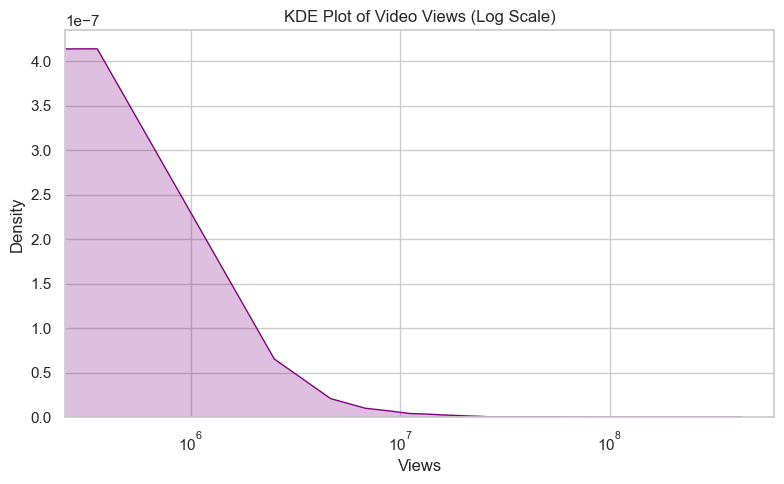

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["views"], fill=True, color="purple", bw_adjust=0.5)

plt.xscale("log")
plt.title("KDE Plot of Video Views (Log Scale)")
plt.xlabel("Views")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


**BoxPlot and Whisker Plot**

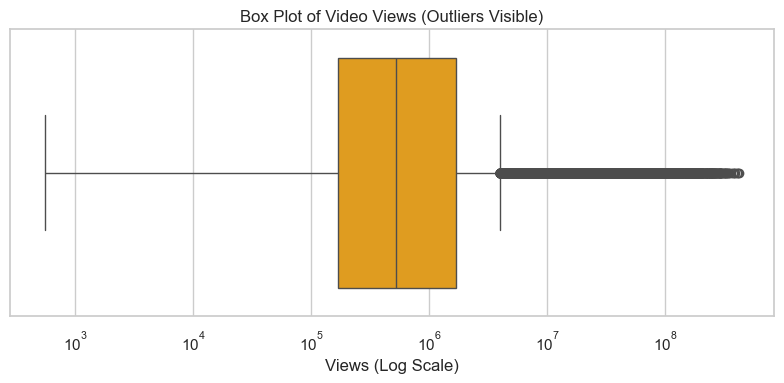

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["views"], color="orange")

plt.xscale("log")
plt.title("Box Plot of Video Views (Outliers Visible)")
plt.xlabel("Views (Log Scale)")
plt.tight_layout()
plt.show()


**HeatMap**

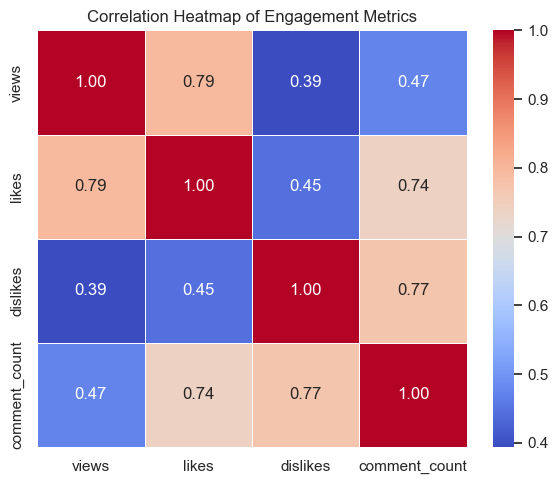

In [9]:
corr_cols = ["views", "likes", "dislikes", "comment_count"]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Engagement Metrics")
plt.tight_layout()
plt.show()



**PieChart**

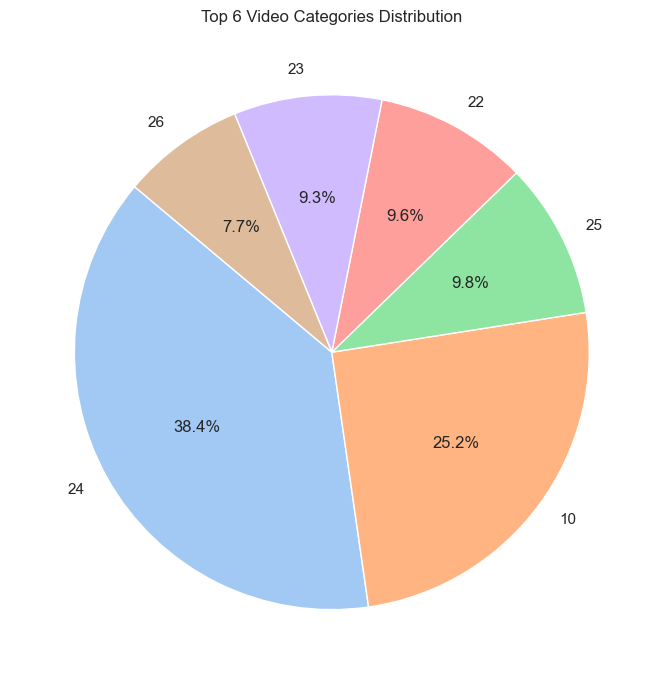

In [10]:
top_categories = df["category_id"].value_counts().head(6)

plt.figure(figsize=(7, 7))
plt.pie(
    top_categories.values,
    labels=top_categories.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Top 6 Video Categories Distribution")
plt.tight_layout()
plt.show()


**Scatter Plot**

In [18]:
#Country-wise Scatter Plot

files = {
    "US": "../data/USvideos.csv",
    "IN": "../data/INvideos.csv",
    "GB": "../data/GBvideos.csv"
}

dfs = []
for country, path in files.items():
    temp = pd.read_csv(path)
    temp["country"] = country
    dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)



In [19]:
sample_df = df.sample(6000, random_state=42)


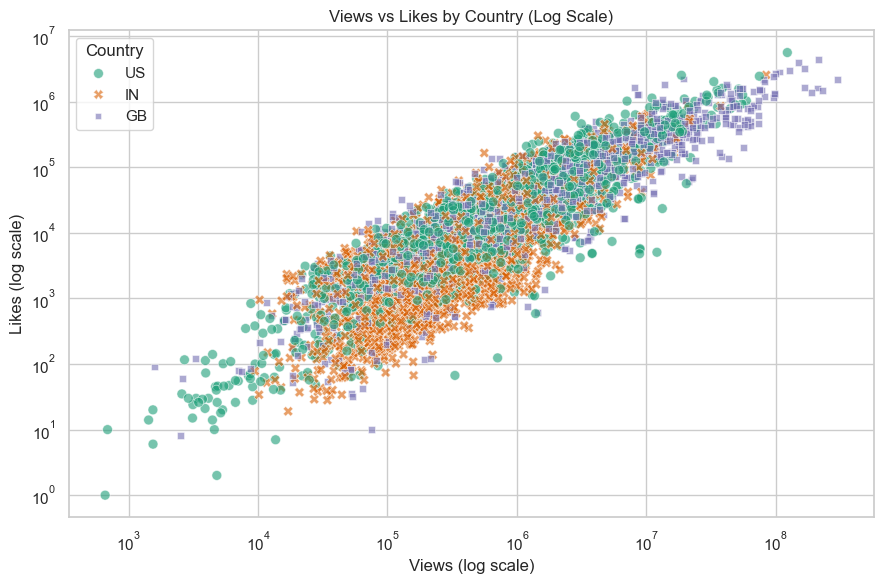

In [22]:
plt.figure(figsize=(9, 6))

sns.scatterplot(
    data=sample_df,
    x="views",
    y="likes",
    hue="country",
    style="country",
    palette="Dark2",        # nice, soft colors
    alpha=0.6,
    s=50                   # point size
)

plt.xscale("log")
plt.yscale("log")

plt.title("Views vs Likes by Country (Log Scale)")
plt.xlabel("Views (log scale)")
plt.ylabel("Likes (log scale)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


**Time Series Line Graph**

In [15]:

videos_per_year_country = (
    df.dropna(subset=["publish_time"])
      .assign(year=df["publish_time"].dt.year)
      .groupby(["year", "country"])
      .size()
      .reset_index(name="video_count")
)



In [16]:
videos_per_year_country.head()

,year,country,video_count
0,2006,US,1
1,2007,GB,37
2,2008,GB,43
3,2008,US,11
4,2009,GB,13


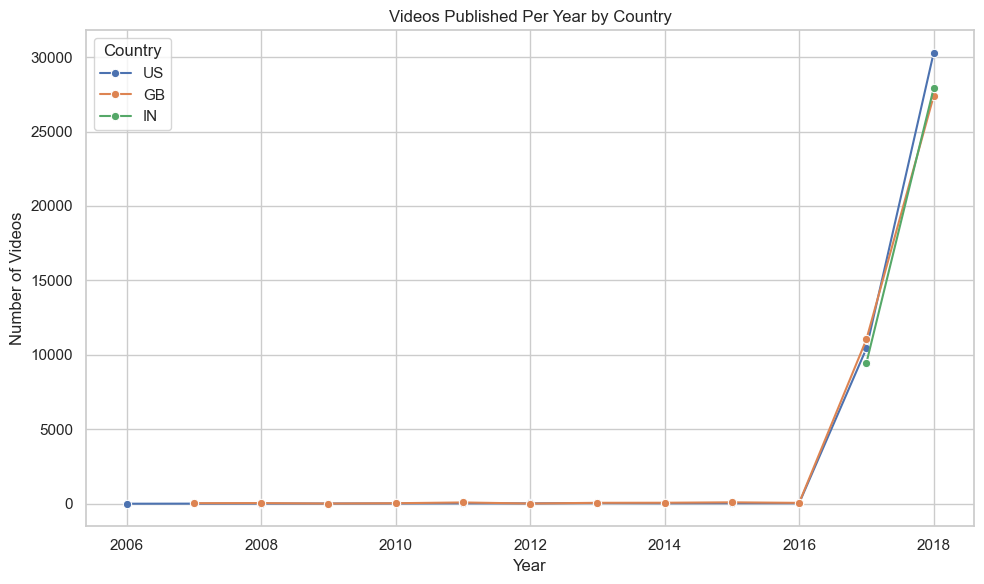

In [17]:
#Multiple colored lines (US, IN, GB)
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=videos_per_year_country,
    x="year",
    y="video_count",
    hue="country",
    marker="o"
)

plt.title("Videos Published Per Year by Country")
plt.xlabel("Year")
plt.ylabel("Number of Videos")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


In [27]:
#saved the map of scatter view graph
plt.savefig("../images/scatter_views_likes.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1000x600 with 0 Axes>

In [25]:
#saved the map of heatmap graph
plt.savefig("../images/engagement_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 1000x600 with 0 Axes>

In [26]:
#saved the map of country graph
plt.savefig("../images/videos_per_year_country.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 1000x600 with 0 Axes>